In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults, ARIMAResults
from matplotlib.pyplot import acorr
import sys
print sys.version
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
%pylab inline

2.7.11 (default, Dec  5 2015, 14:44:47) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.0 (clang-700.1.76)]
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
def cleanup(link):
    
    # create df from link
    df = pd.read_csv(link) 
    
    # since the df makes the first value the column header, extract that and save it as both a string and a float
    start = df.columns[0]
    start_float = float(start)
    
    # rename columns so it's easier to shift
    df.rename(columns = {start:'col1'}, inplace = True)
    
    # bump column down to make room for inserting the first value
    df['chaos'] = df.col1.shift(periods = 1)
    
    # append value lost when shifting the dataframe
    shift = pd.DataFrame([[0, df.col1.iloc[48]]], columns = list('AB'))
    shift.rename(columns = {'A':'col1','B':'chaos'}, inplace = True)
    
    # append
    df.append(shift)

    # delete the col1 column
    del df['col1']
    df.dropna()
    
    # insert first value
    df = df.set_value(0,'chaos', start)

    return df

In [4]:
chaos1 = cleanup('http://people.stern.nyu.edu/churvich/Forecasting/Data/CHAOS1')
chaos2 = cleanup('http://people.stern.nyu.edu/churvich/Forecasting/Data/CHAOS2')

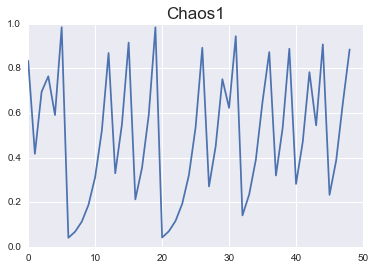

In [5]:
plt.plot(chaos1.chaos)
plt.title('Chaos1', fontsize = 17)

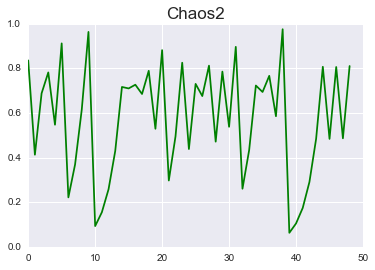

In [31]:
plt.plot(chaos2.chaos,'green')
plt.title('Chaos2', fontsize = 17)

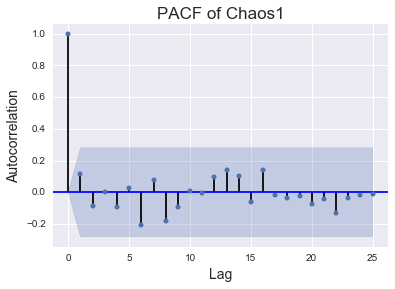

In [6]:
plot_pacf(chaos1.chaos, lags = 25)
plt.xlabel('Lag', fontsize = 14)
plt.ylabel('Autocorrelation', fontsize = 14)
plt.title('PACF of Chaos1', fontsize = 17)

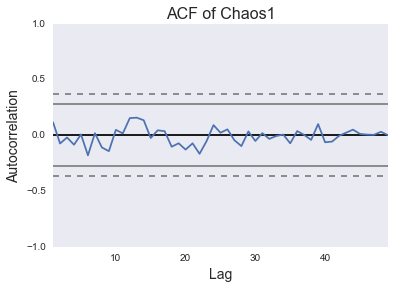

In [7]:
autocorrelation_plot(chaos1.chaos)
plt.xlabel('Lag', fontsize = 14)
plt.ylabel('Autocorrelation', fontsize = 14)
plt.title('ACF of Chaos1', fontsize= 16)

After plotting both Chaos1 and Chaos2, we can see that both time series do not appear random, as each has a prominent periodicity. Furthermore, these values cannot be random, as we calculated them from a simple function and can easily predict the output of a given input. Despite its obvious periodicity, both of the time series appear stationary because we do not see any increases in variance or mean over time.

In [8]:
ararray = (chaos1.chaos.dropna().as_matrix())

p=0
q=0
d=0
pdq=[]
aic=[]

for p in range(7):
    for d in range(7):
        for q in range(7):
            try:
                model = ARIMA(ararray, (p,d,q)).fit()
                x = model.aic
                x1 = (p,d,q)
            
                print (x1, x)
                aic.append(x)
                pdq.append(x1)
            except:
                pass
            
            
keys = pdq
values = aic
d = dict(zip(keys, values))
print (d)

((0, 0, 0), 21.424011935349487)
((0, 0, 1), 22.597370200663164)
((0, 0, 2), 24.194102960382466)
((0, 0, 3), 26.112060597312635)
((0, 0, 4), 26.821754948840578)
((0, 0, 5), 28.803521972817208)
((0, 0, 6), 28.971709526655843)
((0, 1, 0), 47.745600899062225)
((0, 1, 1), 27.311394764592805)
((0, 1, 2), 28.381672965413728)
((0, 2, 0), 94.757543007674599)
((0, 2, 1), 53.473784283743925)
((1, 0, 0), 22.738761553156678)
((1, 0, 1), 23.162628236523474)
((1, 0, 2), 25.162430837009012)
((1, 1, 0), 42.38746606262808)
((1, 1, 1), 28.521853055968137)
((1, 1, 2), 28.95005745331369)
((1, 1, 3), 30.948534081616245)
((1, 2, 0), 77.55576646698697)
((1, 2, 1), 48.82993098409982)
((2, 0, 0), 24.336827112262625)
((2, 0, 1), 25.16242122686822)
((2, 0, 2), 25.756459535362268)
((2, 1, 0), 38.679705968735874)
((2, 1, 1), 30.214419205427617)
((2, 1, 3), 30.040343525855988)
((2, 2, 0), 65.66402967692675)
((2, 2, 1), 45.72367618501386)
((2, 2, 4), 39.36477661281981)
((2, 2, 5), 41.23099239246105)
((3, 0, 0), 26.33

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((3, 1, 1), 32.21206528906376)
((3, 1, 3), 34.49839299250962)
((3, 2, 0), 63.74856583583397)
((3, 2, 1), 46.535773743204174)
((4, 0, 0), 27.910727134288706)
((4, 0, 1), 29.305980571213965)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((4, 0, 2), 29.81435145855761)
((4, 0, 3), 31.549779055606905)
((4, 0, 4), 29.79277578241002)
((4, 1, 0), 37.74686363958877)
((4, 1, 1), 33.732716748782025)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((4, 1, 2), 34.05547433787915)
((4, 1, 3), 36.903653415626565)
((4, 2, 0), 56.717355192807844)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((4, 2, 1), 45.49808554410603)
((4, 2, 3), 50.16125649150865)
((4, 2, 4), nan)
((4, 2, 5), nan)
((5, 0, 0), 29.84530540374449)
((5, 0, 1), 31.282933967133687)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((5, 0, 2), 31.144613978144463)
((5, 0, 3), nan)
((5, 0, 4), 31.671553830686634)
((5, 1, 0), 39.74238393942673)
((5, 1, 1), 40.6328611770131)
((5, 1, 2), 37.64452053170079)
((5, 2, 0), 58.328615318170364)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((5, 2, 1), 47.4500260255942)
((6, 0, 0), 29.3537049756619)
((6, 0, 1), 30.122474155067238)
((6, 0, 2), 30.0462779453471)
((6, 0, 3), 33.25495985159647)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((6, 0, 4), 34.56710418653654)
((6, 0, 5), 37.706382842329816)
((6, 1, 0), 37.363519053433905)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((6, 1, 1), 34.3376369292897)
((6, 1, 2), 35.5979809092222)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((6, 1, 3), 36.195009877246804)
((6, 1, 4), 37.839482648823335)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((6, 1, 5), 43.54129502465028)
((6, 2, 0), 51.78368297982777)
((6, 2, 1), nan)
{(3, 0, 2): 28.552364681254957, (0, 1, 1): 27.311394764592805, (2, 2, 5): 41.23099239246105, (3, 0, 3): nan, (0, 1, 2): 28.381672965413728, (5, 0, 4): 31.671553830686634, (2, 2, 4): 39.36477661281981, (6, 0, 1): 30.122474155067238, (5, 2, 0): 58.328615318170364, (1, 0, 1): 23.162628236523474, (6, 0, 0): 29.3537049756619, (4, 0, 3): 31.549779055606905, (4, 0, 4): 29.79277578241002, (5, 2, 1): 47.4500260255942, (5, 0, 1): 31.282933967133687, (6, 0, 3): 33.25495985159647, (4, 0, 2): 29.81435145855761, (0, 2, 1): 53.473784283743925, (2, 2, 0): 65.66402967692675, (5, 0, 2): 31.144613978144463, (6, 0, 2): 30.0462779453471, (4, 0, 1): 29.305980571213965, (0, 2, 0): 94.757543007674599, (3, 1, 3): 34.49839299250962, (6, 0, 5): 37.706382842329816, (4, 0, 0): 27.910727134288706, (0, 0, 6): 28.971709526655843, (6, 1, 2): 35.5979809092222, (6, 0, 4): 34.56710418653654, (5, 1, 1): 40.6328611770131, (2, 1, 3): 30.04034352

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [9]:
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print (p,d,q)

(0, 0, 0)


In [10]:
ararray = (chaos2.chaos.dropna().as_matrix())

p=0
q=0
d=0
pdq=[]
aic=[]

for p in range(7):
    for d in range(7):
        for q in range(7):
            try:
                model = ARIMA(ararray, (p,d,q)).fit()
                x = model.aic
                x1 = (p,d,q)
            
                print (x1, x)
                aic.append(x)
                pdq.append(x1)
            except:
                pass
            
            
keys = pdq
values = aic
d = dict(zip(keys, values))
print (d)

((0, 0, 0), 6.2837200721042734)
((0, 0, 1), 8.102775642438928)
((0, 0, 2), 9.151567785635422)
((0, 0, 3), 10.723027002350989)
((0, 0, 4), 12.61243273200003)
((0, 0, 5), 12.827201600359132)
((0, 0, 6), 14.251321772138937)
((0, 1, 0), 36.108689805754402)
((0, 1, 1), 13.038514135718685)
((0, 1, 2), 14.752102533552119)
((0, 2, 0), 87.38867472240517)
((0, 2, 1), 42.16447556572324)
((1, 0, 0), 8.057667637774557)
((1, 1, 0), 23.363654894233463)
((1, 1, 1), 14.66739105569826)
((1, 1, 2), 16.996681137594635)
((1, 1, 3), 17.252428544867797)
((1, 2, 0), 56.8430045031139)
((1, 2, 1), 30.57859112264613)
((1, 2, 2), 26.582479133882373)
((2, 0, 0), 9.418333412073252)
((2, 0, 1), 10.930108677345487)
((2, 1, 0), 24.06465669251287)
((2, 1, 1), 15.807090916555808)
((2, 1, 2), 17.359327207748436)
((2, 1, 3), 18.73414035915556)
((2, 2, 0), 50.822135243239885)
((2, 2, 1), 31.562767944795453)
((2, 2, 2), 32.72767020672133)
((3, 0, 0), 10.492863627112797)
((3, 0, 1), 8.684417926254355)
((3, 0, 2), 10.66018223

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((3, 1, 3), 17.92186143491)
((3, 1, 4), 23.72130997012448)
((3, 2, 0), 46.54267553294507)
((3, 2, 1), 31.57930375792428)
((4, 0, 0), 12.353469743927462)
((4, 0, 1), 12.356365949114036)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((4, 0, 2), 11.22612152760928)
((4, 0, 3), 11.478516120771815)
((4, 1, 0), 24.704219352105355)
((4, 1, 1), 19.050171897381063)
((4, 1, 2), 19.080100940528524)
((4, 1, 3), 20.14679759062031)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((4, 1, 4), 20.952707968927115)
((4, 2, 0), 44.94179354606844)
((4, 2, 1), 32.87439814472708)
((4, 2, 2), 32.69475873663852)
((5, 0, 0), 13.87304738408588)
((5, 0, 1), 12.484848782927855)
((5, 0, 2), 12.905182701448837)
((5, 0, 3), 13.428799638974425)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((5, 0, 4), 17.157753304103238)
((5, 1, 0), 25.680639080291343)
((5, 1, 1), 20.724081812944974)
((5, 1, 2), 20.988697777298825)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((5, 1, 3), 22.187795233147483)
((5, 1, 4), 22.83492633055684)
((5, 2, 0), 44.2733355464851)
((6, 0, 0), 15.447053988588095)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((6, 0, 1), 14.506376126735148)
((6, 0, 2), 17.29209645810505)
((6, 0, 3), 20.01252535746451)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((6, 0, 4), 19.263902880571607)
((6, 0, 5), 21.522018000008245)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((6, 0, 6), 23.763786477864983)
((6, 1, 0), 26.52082830027939)
((6, 1, 1), 22.467764071533253)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((6, 1, 2), 21.511699719261173)
((6, 1, 3), 24.15429173033482)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



((6, 1, 4), 26.66114643031068)
((6, 1, 5), nan)
((6, 2, 0), 42.429916333012315)
{(3, 0, 2): 10.660182239648066, (0, 1, 1): 13.038514135718685, (4, 2, 2): 32.69475873663852, (3, 0, 3): 15.950702174928239, (0, 1, 2): 14.752102533552119, (5, 0, 4): 17.157753304103238, (6, 0, 1): 14.506376126735148, (5, 2, 0): 44.2733355464851, (6, 0, 0): 15.447053988588095, (4, 0, 3): 11.478516120771815, (6, 2, 0): 42.429916333012315, (5, 0, 1): 12.484848782927855, (5, 1, 4): 22.83492633055684, (6, 0, 3): 20.01252535746451, (4, 0, 2): 11.22612152760928, (0, 2, 1): 42.16447556572324, (2, 2, 0): 50.822135243239885, (5, 0, 2): 12.905182701448837, (6, 0, 2): 17.29209645810505, (4, 0, 1): 12.356365949114036, (0, 2, 0): 87.38867472240517, (3, 1, 3): 17.92186143491, (6, 0, 5): 21.522018000008245, (4, 0, 0): 12.353469743927462, (0, 0, 6): 14.251321772138937, (6, 1, 2): 21.511699719261173, (3, 2, 1): 31.57930375792428, (6, 0, 4): 19.263902880571607, (5, 1, 1): 20.724081812944974, (3, 1, 4): 23.72130997012448, (0,

In [11]:
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print (p,d,q)

(0, 0, 0)


Although the plots of Chaos1 and Chaos2 appear to have some sort of underlying structure, the results of the Box-Jenkins model fitment show that the model with the lowest AIC score is an ARIMA(0,0,0), or white noise. Consequently, we should re-state our current assumption that the time series are not random.

In [12]:
#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(chaos1.chaos, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                -5.990408e+00
p-value                        1.751143e-07
# Lags Used                    0.000000e+00
Number of Observations Used    4.800000e+01
Critical Value (5%)           -2.923954e+00
Critical Value (1%)           -3.574589e+00
Critical Value (10%)          -2.600039e+00
dtype: float64


The Augmented Dickey-Fuller (ADF) test shows us that the time series is stationary. Since our test statistic of -6 is less than our 1% critical value of -3.57, we are 99% confident that the time series is stationary.

### 3) Plot the ACF and PACF for chaos1. Based on these, suggest an ARMA model. Would this model provide the best possible forecasts?

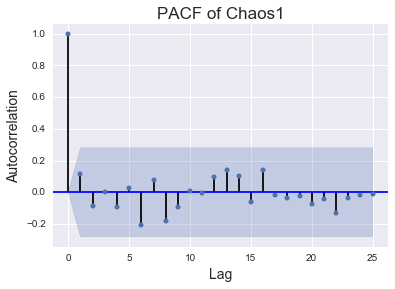

In [13]:
plot_pacf(chaos1.chaos, lags = 25)
plt.xlabel('Lag', fontsize = 14)
plt.ylabel('Autocorrelation', fontsize = 14)
plt.title('PACF of Chaos1', fontsize = 17)

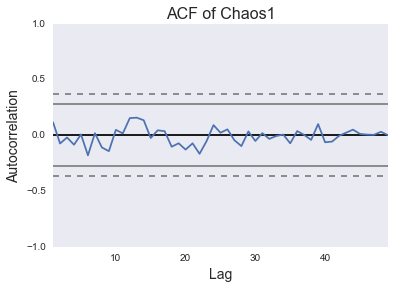

In [14]:
autocorrelation_plot(chaos1.chaos)
plt.xlabel('Lag', fontsize = 14)
plt.ylabel('Autocorrelation', fontsize = 14)
plt.title('ACF of Chaos1', fontsize= 16)

Based on the results of the ACF and PACF, we can see that the Chaos1 time series demonstrates no autocorrelation and is best described by an ARIMA(0,0,0) model, which was identified by testing many models and selecting the one with the lowest AIC score. This means we are trying to predict white noise and that zero is probably the best linear predictor. However, this will not provide us with the best possible forecast because we are trying to fit a linear model to a distinctly non-linear time series. 

### 4) Plot both chaos1 and chaos2 on the same plot. Do the paths look similar? Should they look similar when t is close to 1? Why? What should happen if chaos1 and chaos2 happen to get very close together at some later time? Use the plot to help justify your answer.

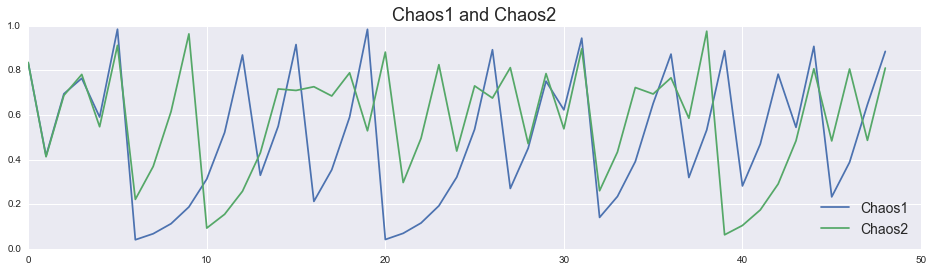

In [15]:
fig, ax = plt.subplots(figsize = (16,4))

plt.subplot(111)
plt.plot(chaos1.chaos, label = 'Chaos1')
plt.plot(chaos2.chaos, label = 'Chaos2')
plt.title('Chaos1 and Chaos2', fontsize = 18)
plt.legend(loc = 4, fontsize = 14)

The two functions are very similar at t = 1 because their initial conditions are the same. However, over time, we see the two functions diverge, with Chaos2's amplitude accelerating as t increases. 

### 5) Plot x2, . . . , x50 versus x1, . . . , x49, where {xt} is the series of observations on chaos1. Does this reveal the map (in other words, the function f ) which generated the data? Do you see why this f is called the tent map? Does this plot help us to see that {xt } is not an AR (1) series? How?

In [16]:
chaos1.head()

,chaos
0,0.833333
1,0.416667
2,0.694444
3,0.763889
4,0.590278


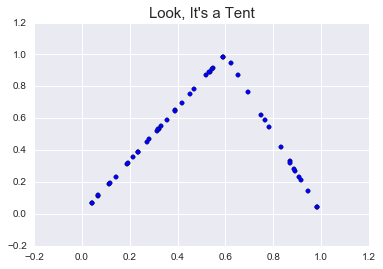

In [17]:
x = chaos1[1:-1]
y = chaos1[0:-2]

plt.scatter(y,x)
plt.title("Look, It's a Tent", fontsize = 15)

Yes, this plot reveals the map that generated our data, and we can see that is called a tent map because, well, it looks like a tent. More importantly, it also shows us that this time series cannot be described using an AR(1) model, as that would require one constant (alpha). With only one alpha, we would see both series moving in a linear fashion. However, as we can see in the graph, the alphas diverge and push the points further apart as we move from 1 to 0. This behavior can be verified from our answer to question 4, where we saw that Chaos1 and Chaos2 initialized very close together before divering. Using the tent map, we can further verify the unlikelihood that these two series will converge as t increases. 